In [5]:
# 사전 세팅, 모듈 추가

# 넘파이 추가
import numpy as np  
# 판다스 추가 
import pandas as pd  
# 파이플롯 추가
import matplotlib.pyplot as plt  
# 시본 추가
import seaborn as sns 
# ? 플롯 스타일 추가 
plt.style.use('fivethirtyeight')
# 경고 문구 무시 
import warnings
warnings.filterwarnings('ignore')

In [8]:
# 타이타닉 데이터 불러오기
data=pd.read_csv('./titanic/train.csv')

In [7]:
# 데이터 위에 있는 것들 출력
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# 결측치 확인 
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

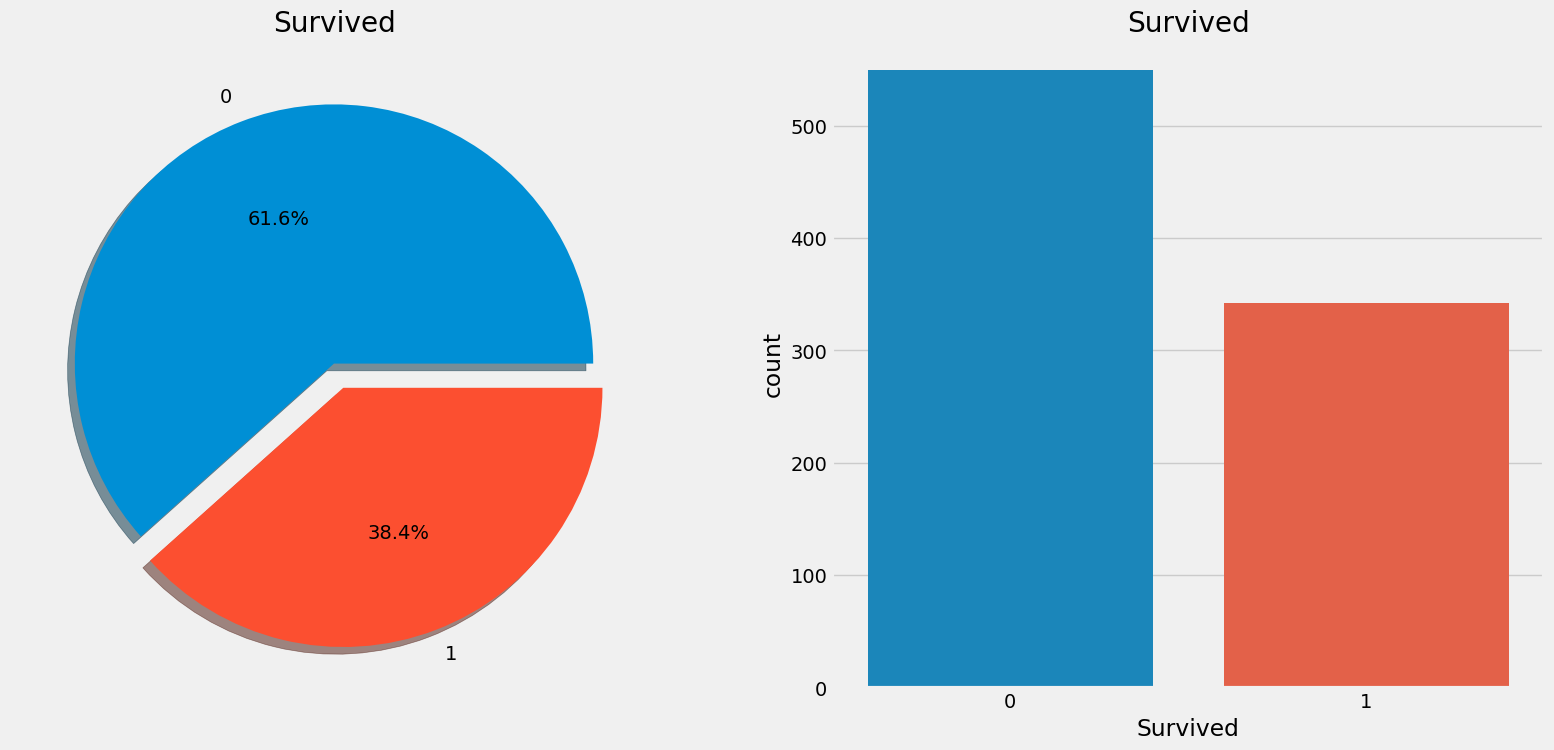

In [19]:
# 서브 플랏 1행 2열
f, ax = plt.subplots(1, 2, figsize = (18, 8))
# 데이터의 생존 칼럼에서 사망과 생존의 개수를 체크함
# 그것을 파이 플롯으로 만들고, 생존 부분에 하이라이팅
# 퍼센트를 표기하기 위해 autopct 사용
# 서브 플롯의 0번 인덱스에 적용
data['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct='%1.1f%%', ax = ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

# 카운트 플랏으로 1번 인덱스 채우기 
sns.countplot(data = data, x= 'Survived', ax = ax[1])
ax[1].set_title('Survived')
plt.show()

In [27]:
# 성별과 생존을 멀티 인덱스를 사용해서 묶기 
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

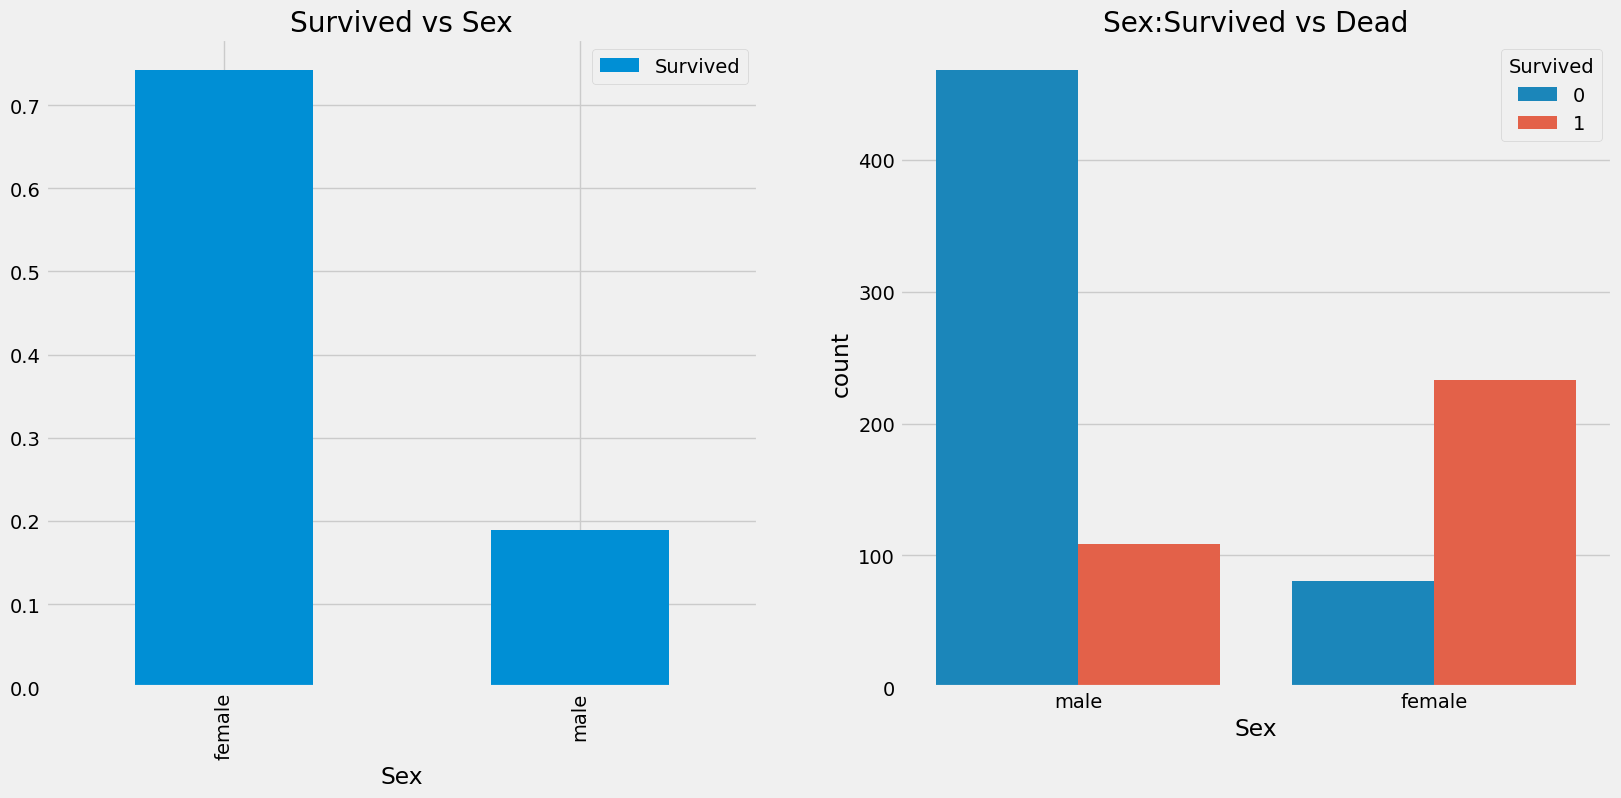

In [31]:
# 1행 2열 서브 플랏 
f, ax = plt.subplots(1, 2, figsize = (18, 8))

# 성별에 따른 생존자 수의 평균을 구한 후 바 플랏으로 만들기, 0번 인덱스
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')

# 성별에 따른 생존자, 사망자 수를 카운트 플랏으로 표시, 1번 인덱스로
sns.countplot(x = 'Sex', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [34]:
# 좌석과 생존 여부 표시
# 사망자 수가 더 많지만, 좌석 등급이 올라갈 수록 생존자 비율이 증가
pd.crosstab(data.Pclass, data.Survived, margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


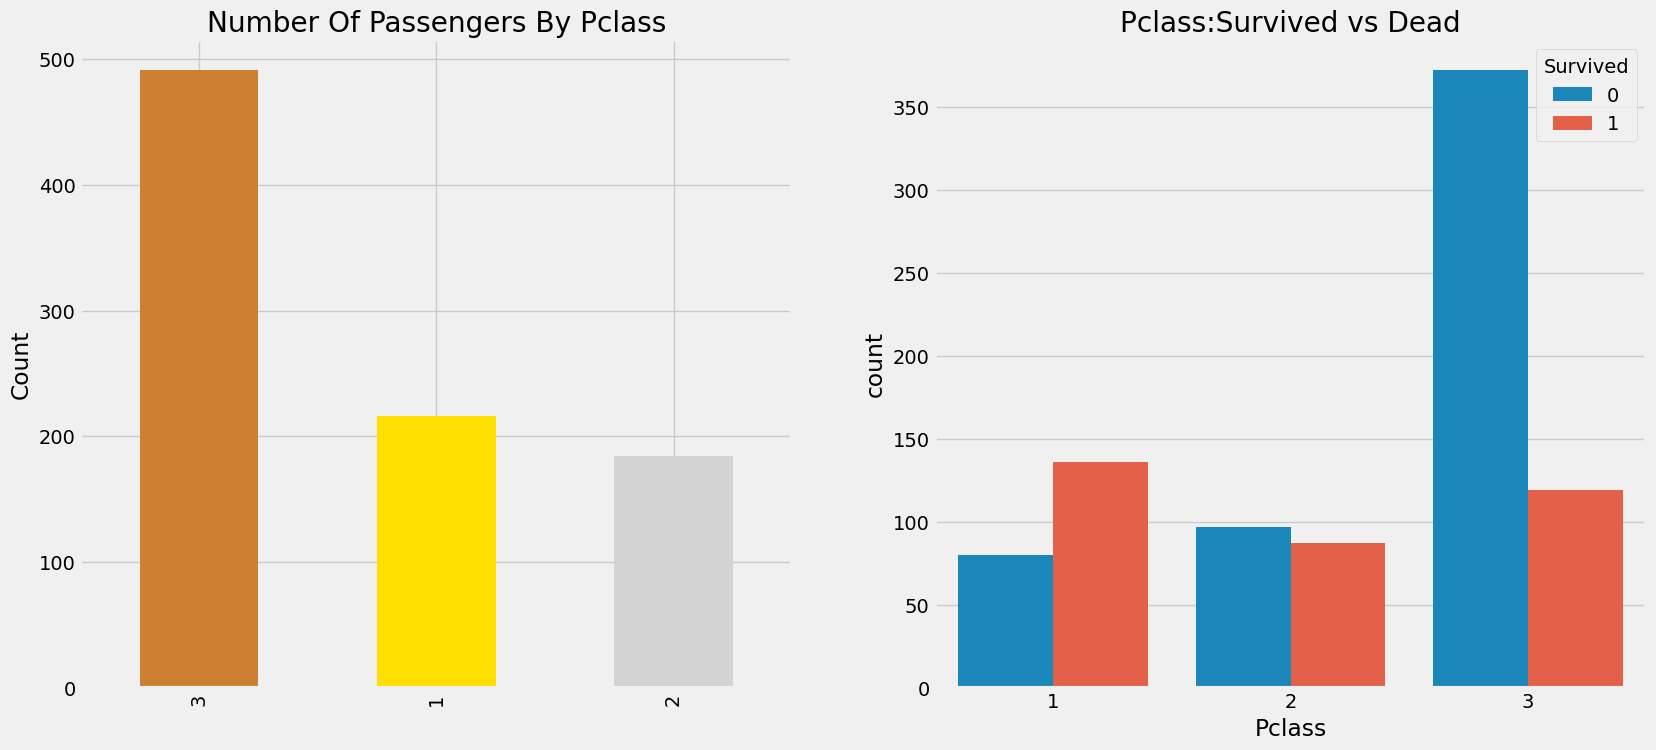

In [35]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
# 좌석 등급에 따른 인원수를 바 플랏으로 표기
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax = ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

# 좌석 등급 별 생존 여부로 나누어 표기
sns.countplot(x = 'Pclass', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [42]:
# 성별과 생존 여부를 멀티 인덱스로
# 좌석 등급의 인원수를 표기
# 여자는 1등급과 2등급 모두 생존률이 매우 높지만 3등급만 낮음
# 남자의 경우 2등과 3등급에 비해 1등급만 생존률이 높음
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins = True).style.background_gradient(cmap = 'summer_r')

In [43]:
# 출력은 안되지만 크로스팔릇을 선 그래프로 보여줌
sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = data)
plt.show()

AttributeError: module 'seaborn' has no attribute 'factorplot'

In [44]:
# 최대 최소 평균 나이를 출력
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


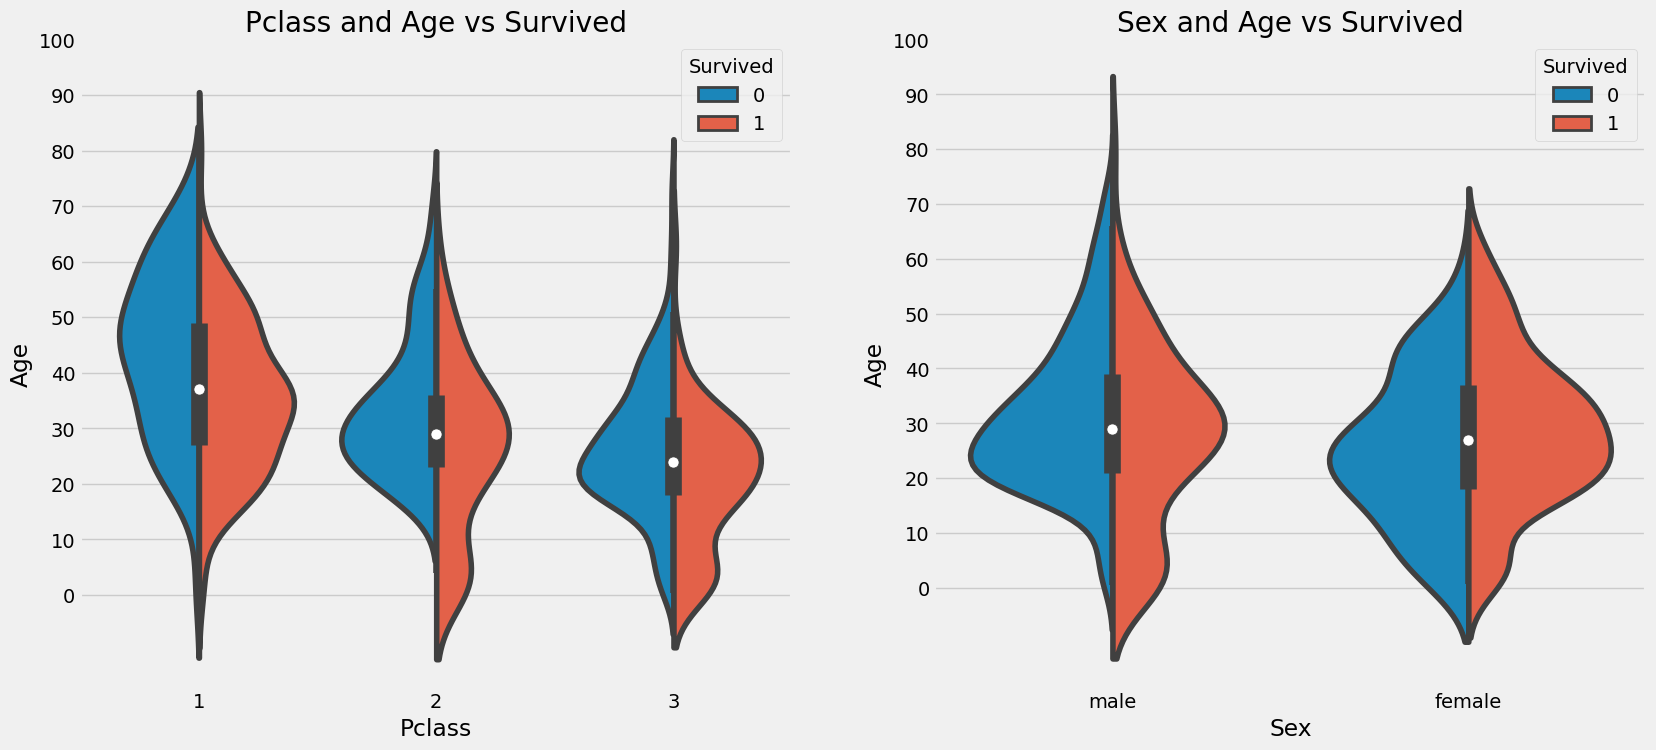

In [51]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

# 바이올린 플랏으로 좌석에 따른 나이 분포를 생존 여부로 나누어 출력 
# split 옵션을 True로 하면 hue로 나눈것이 반반 합쳐짐
sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data, split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

# 성별에 따른 나이 분포를 생존 여부로 나누어 출력
sns.violinplot(x = 'Sex', y = 'Age', hue = 'Survived', data = data, split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

extract 정규표현식
[링크](https://velog.io/@hhhs101/Pandas-%EC%A0%95%EA%B7%9C%ED%91%9C%ED%98%84%EC%8B%9D-str.extractstr.contains)

In [57]:
# 이름 문자열에서 한단어를 무시하고 두번째 단어 가지고 오기
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [58]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap = 'summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [59]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [61]:
# 이니셜에 따른 평균 연령
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [75]:
# 결측치에는 평균 나이 넣기
data.loc[((data.Age.isnull()) & (data.Initial == 'Mr')), 'Age'] == 33
data.loc[((data.Age.isnull()) & (data.Initial == 'Mrs')), 'Age'] == 36
data.loc[((data.Age.isnull()) & (data.Initial == 'Master')), 'Age'] == 5
data.loc[((data.Age.isnull()) & (data.Initial == 'Miss')), 'Age'] == 22
data.loc[((data.Age.isnull()) & (data.Initial == 'Other')), 'Age'] == 46

Series([], Name: Age, dtype: bool)

In [79]:
# 칼럼에 NaN 값이 하나라도 있으면 True, 없으면 False
data.Age.isnull().any()

False

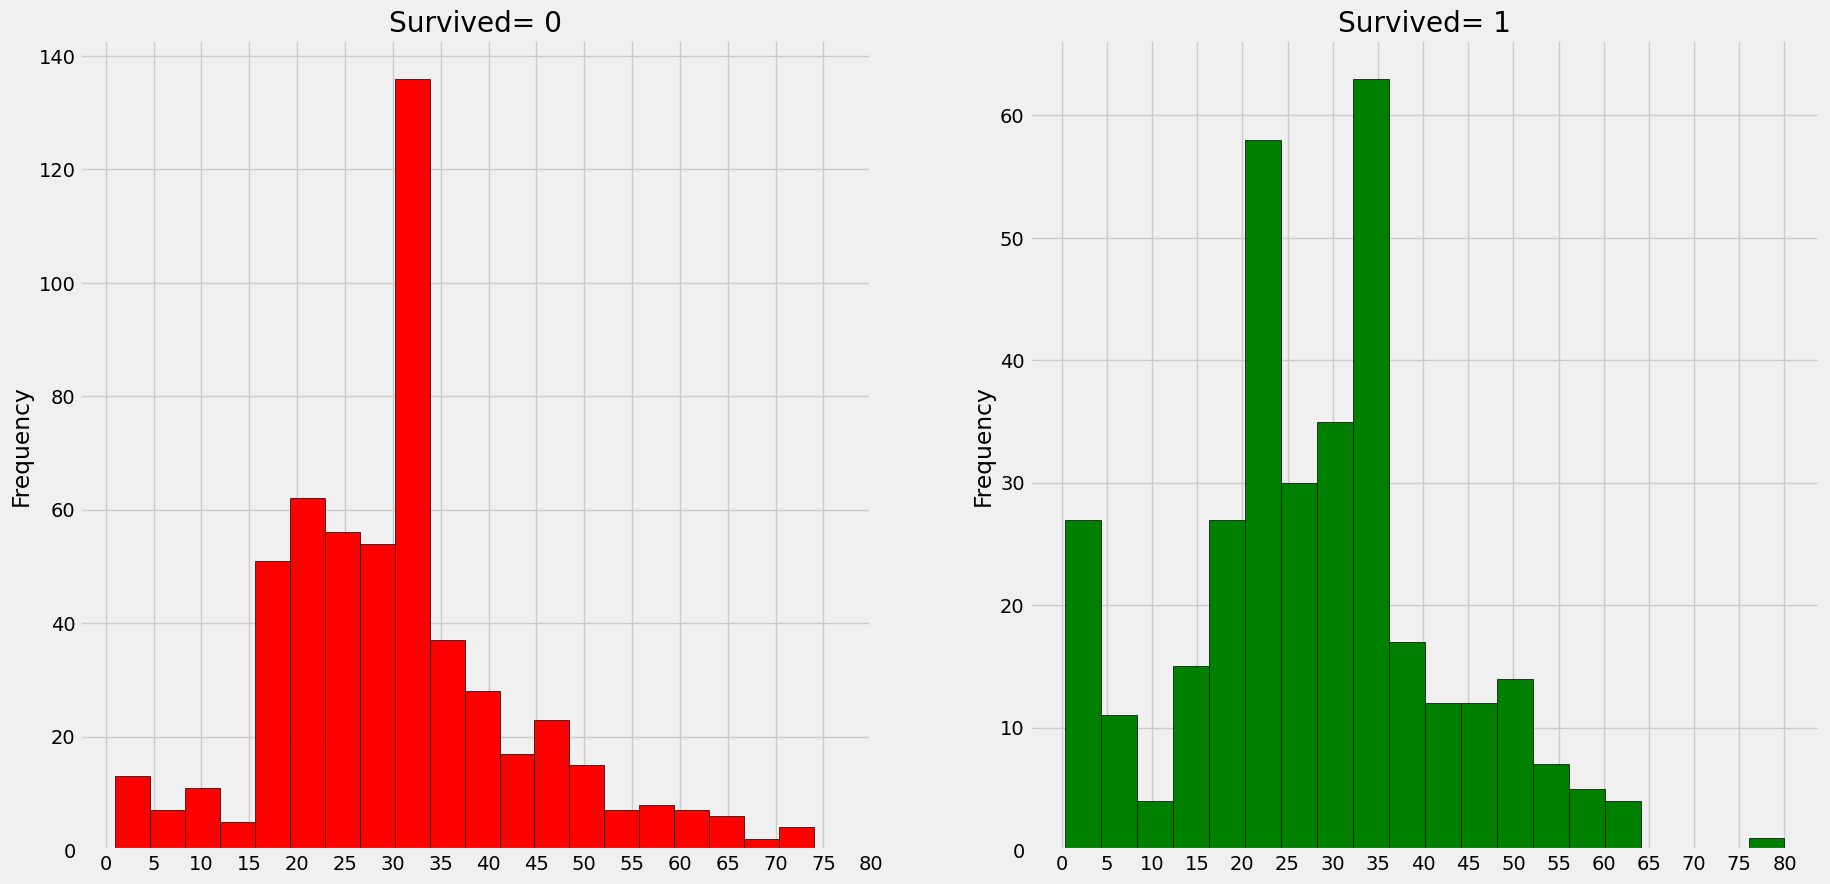

In [84]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))

# 사망자들의 연령을 히스트 플랏으로 표시
data[data['Survived'] == 0].Age.plot.hist(ax = ax[0], bins = 20, edgecolor = 'black', color = 'red')
ax[0].set_title('Survived= 0')
x1= list(range(0, 85, 5))
ax[0].set_xticks(x1);

# 생존자들의 연령을 히스트 플랏으로 표시
data[data['Survived'] == 1].Age.plot.hist(ax = ax[1], color = 'green', bins = 20, edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

In [92]:
sns.factorplot(x = 'Pclass',y = 'Survived', col = 'Initial',data = data)
plt.show()

AttributeError: module 'seaborn' has no attribute 'factorplot'

In [87]:
#  승선 위치와 좌석 등급, 성별과 생존 여부를 멀티 인덱스로 묶어 크로스 탭 만들기
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins = True).style.background_gradient(cmap = 'summer_r')

In [93]:
sns.factorplot('Embarked', 'Survived', data = data)  
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

AttributeError: module 'seaborn' has no attribute 'factorplot'

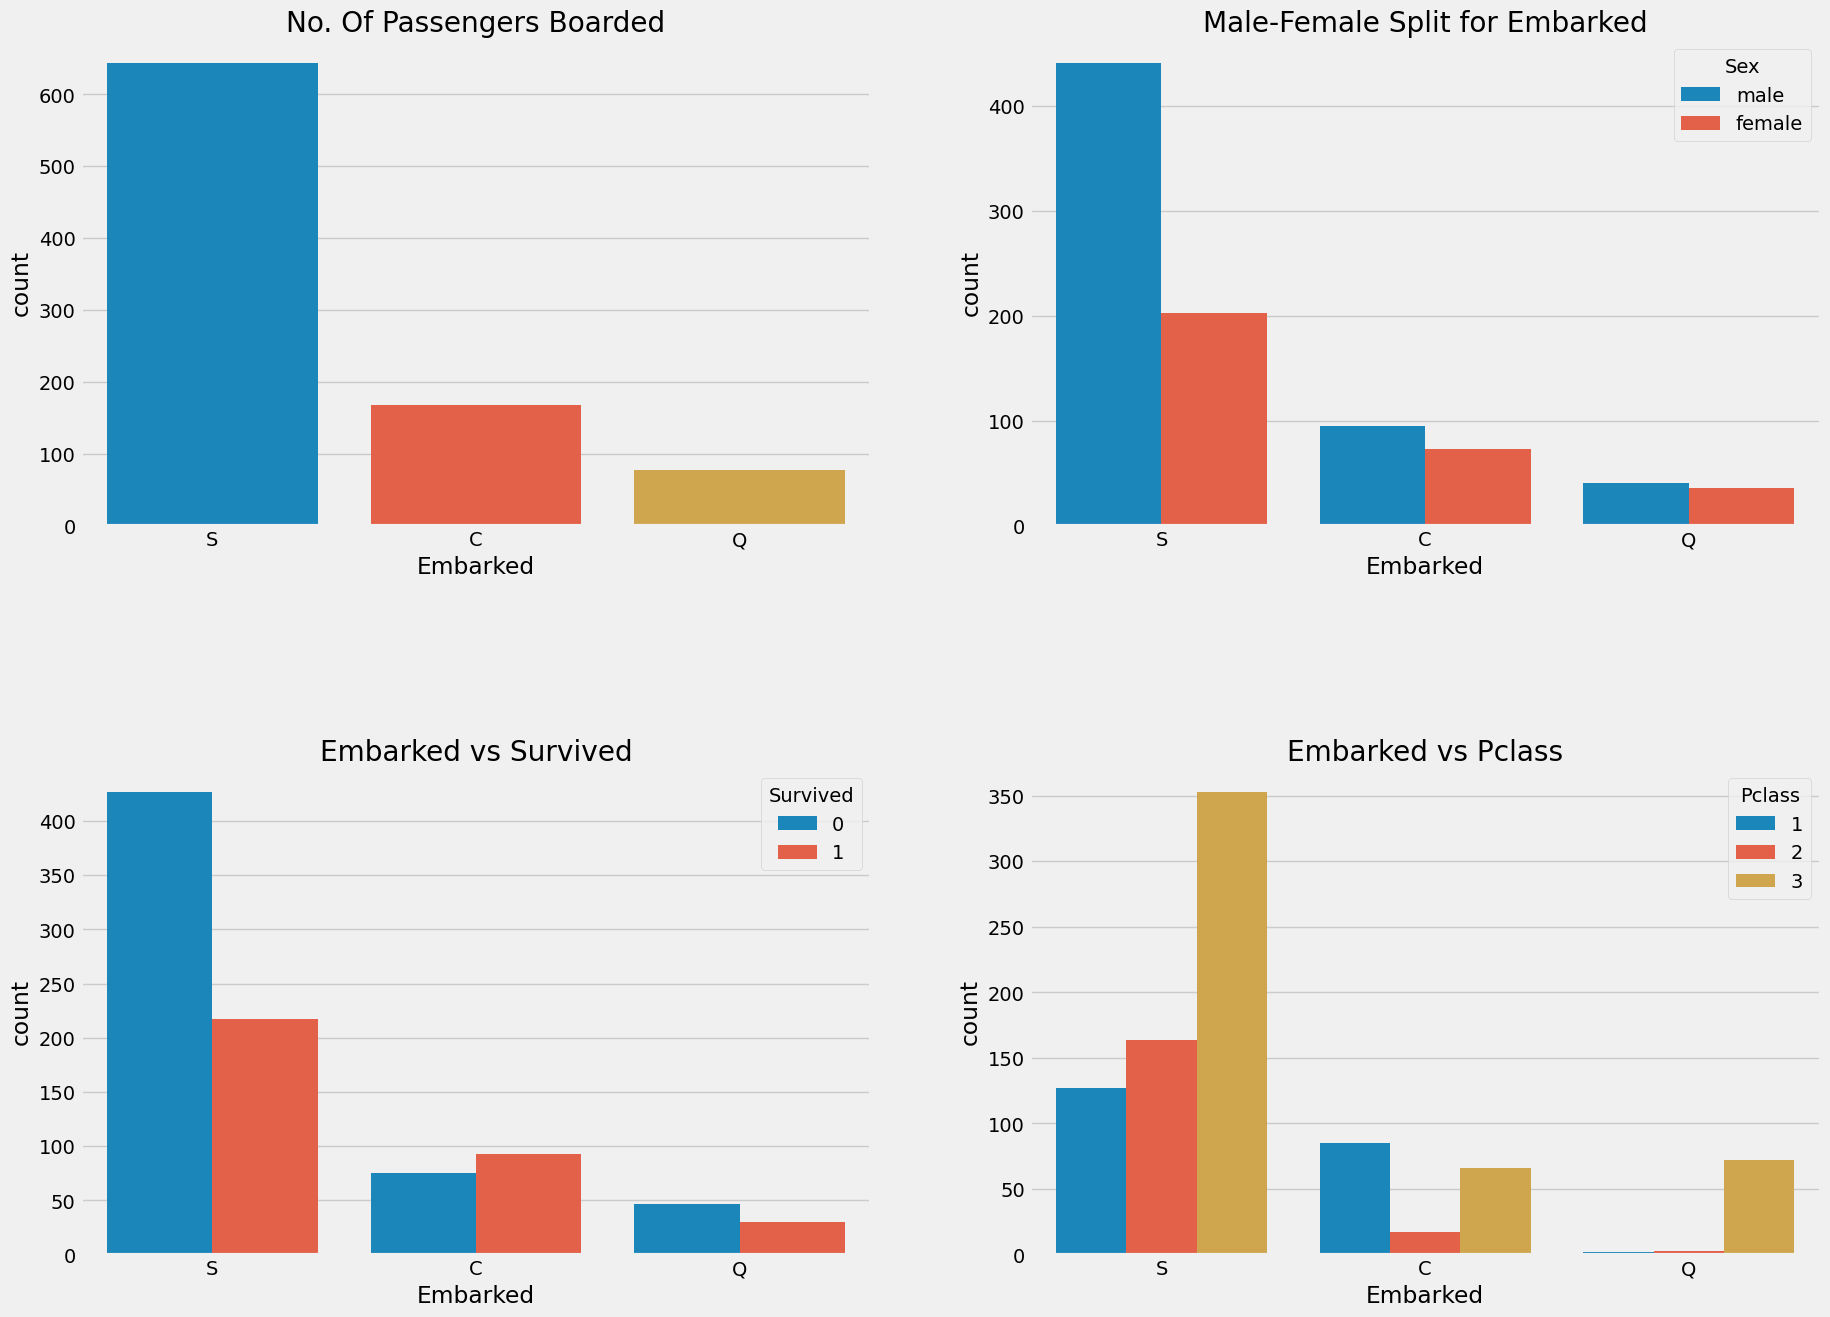

In [99]:
f, ax = plt.subplots(2, 2, figsize = (20, 15))

# 승선 위치 카운트
sns.countplot(x = 'Embarked', data = data, ax = ax[0, 0]) 
ax[0, 0].set_title('No. Of Passengers Boarded')

# 승선 위치를 성별로 나누어 카운트
sns.countplot(x = 'Embarked', hue = 'Sex', data = data, ax = ax[0, 1]) 
ax[0, 1].set_title('Male-Female Split for Embarked')

# 승선 위치를 생존 여부로 나누어 카운트
sns.countplot(x = 'Embarked', hue = 'Survived', data = data, ax = ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')

# 승선 위치를 좌석 등급으로 나누어 카운트
sns.countplot(x = 'Embarked', hue = 'Pclass', data = data, ax = ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')

# 서브플롯 간의 간격 조절, 옆으로 0.2, 위로 0.5
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

# C에서 승선한 사람들의 생존률이 높은데 1등급 자리에 탄 비율이 높음

In [100]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', col = 'Embarked', data = data)
plt.show()

AttributeError: module 'seaborn' has no attribute 'factorplot'

In [102]:
# 승선 위치의 결측값에 S로 채우기
data['Embarked'].fillna('S', inplace = True)

In [104]:
# 승선 위치에 결측값이 있는지 확인
data.Embarked.isnull().any()

False

In [107]:
# 함께 탑승한 사람 수와 생존 여부를 크로스탭으로 표시
# 함께 탑승한 사람이 적을 수록 생존률이 높아 보임
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap = 'summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


AttributeError: module 'seaborn' has no attribute 'factorplot'

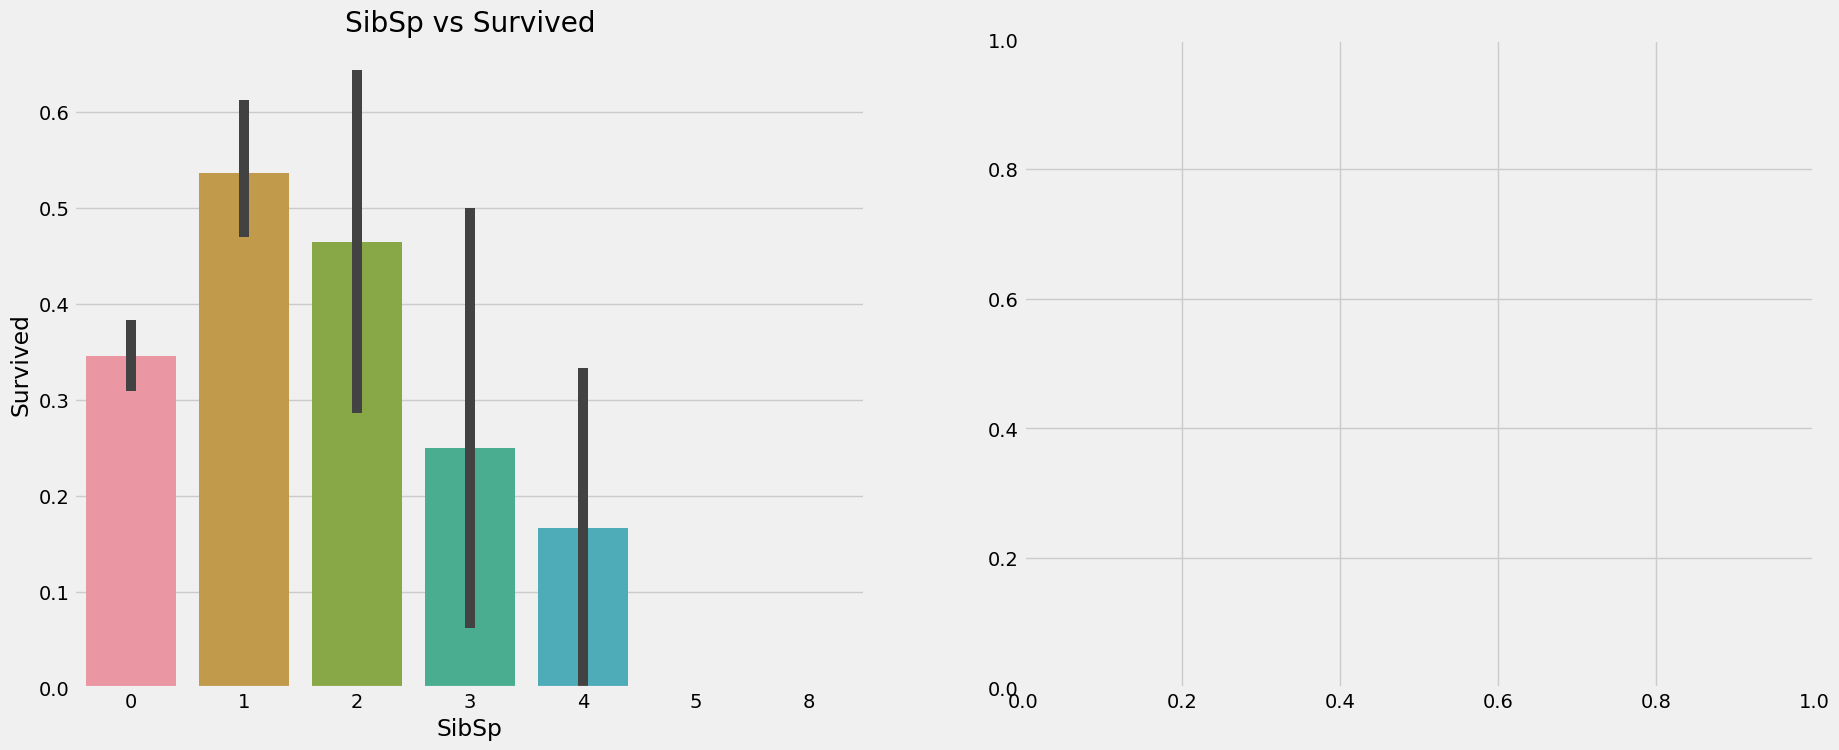

In [110]:
f, ax = plt.subplots(1, 2, figsize = (20, 8))

sns.barplot(x = 'SibSp', y = 'Survived', data = data, ax = ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp', 'Survived', data = data, ax = ax[1])
ax[1].set_title('SibSp vs Survived') 
plt.close(2)
plt.show()

In [116]:
# 함께 탑승한 사람 수와 좌석 등급을 묶어 크로스 탭
# 둘이 탄 사람일 수록 높은 등급의 좌석에 앉았다 -> 높은 등급일 수록 생존률이 높다 -> 둘이 탄 사람은 생존률이 높다
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [118]:
# 부모또는 형제와 탑승했어도 인원이 적을 수록 높은 등급에 앉았다
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


AttributeError: module 'seaborn' has no attribute 'factorplot'

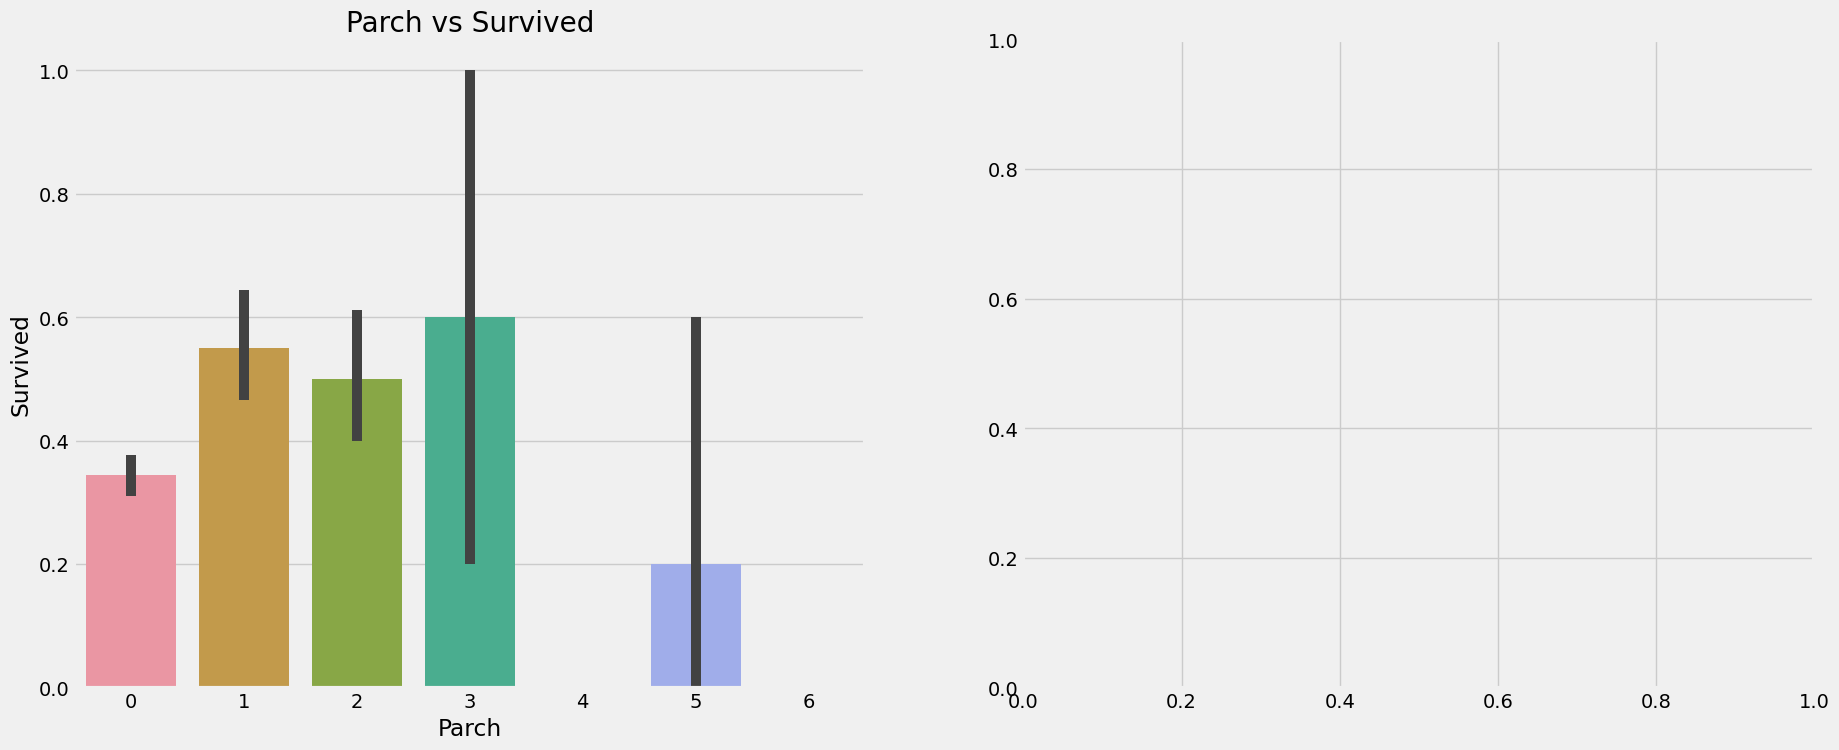

In [119]:
f, ax = plt.subplots(1, 2, figsize = (20, 8))
sns.barplot(x = 'Parch', y = 'Survived', data = data, ax = ax[0])
ax[0].set_title('Parch vs Survived')

sns.factorplot('Parch', 'Survived', data = data, ax = ax[1]) 
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

In [121]:
# 티켓 요금 최대 최소 평균 출력
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


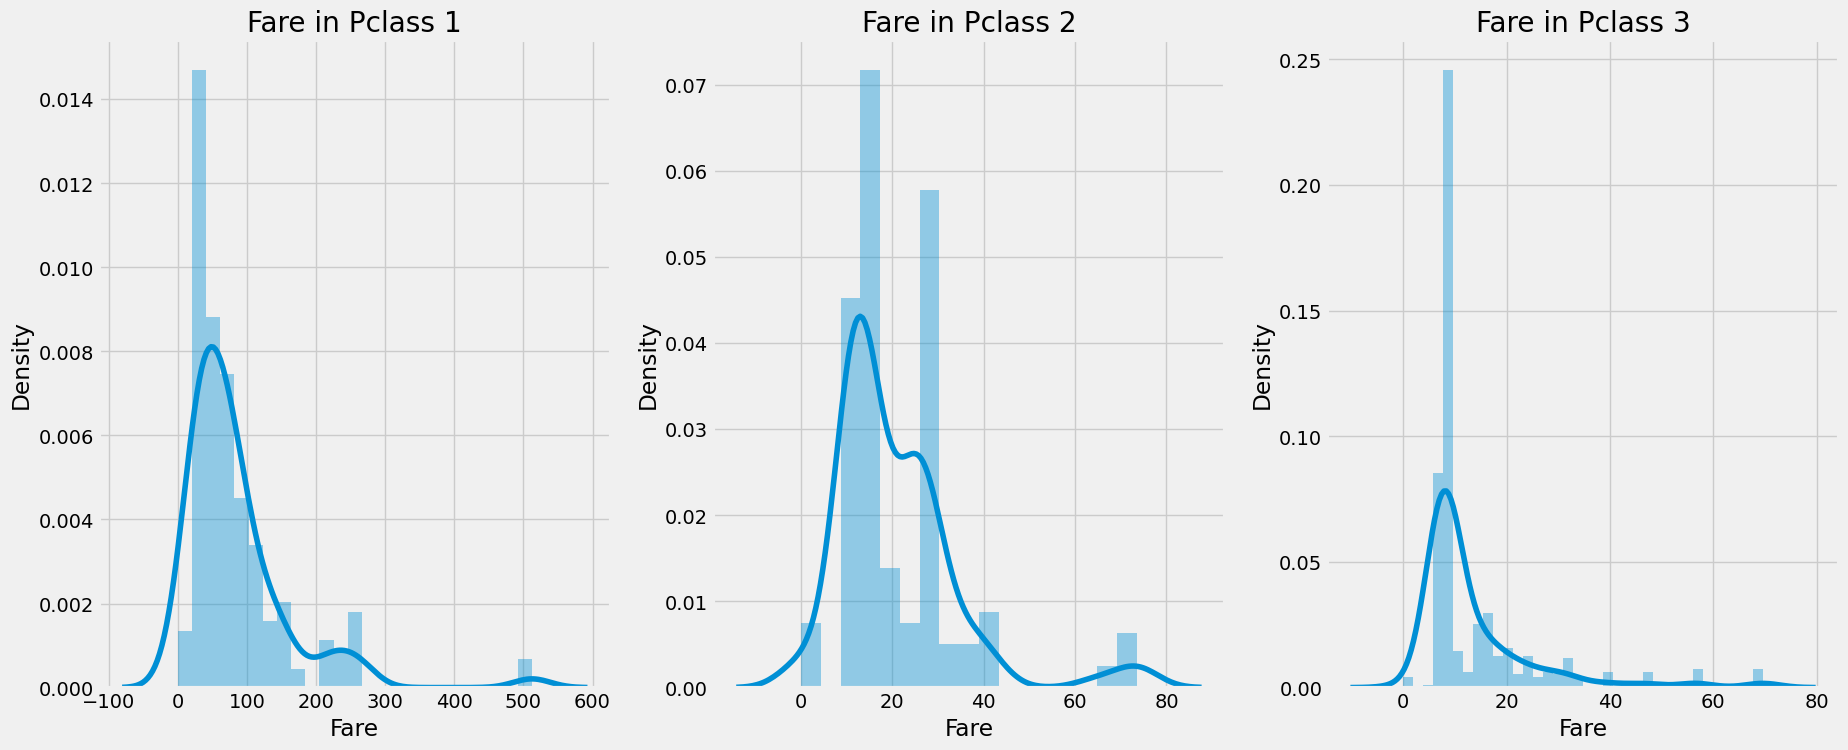

In [123]:
f, ax = plt.subplots(1, 3, figsize = (20, 8))

# 1등급 좌석의 티켓값 
sns.distplot(data[data['Pclass'] == 1].Fare, ax = ax[0])
ax[0].set_title('Fare in Pclass 1')

# 2등급 좌석의 티켓값 
sns.distplot(data[data['Pclass'] == 2].Fare, ax = ax[1])
ax[1].set_title('Fare in Pclass 2')

# 3등급 좌석의 티켓값 
sns.distplot(data[data['Pclass'] == 3].Fare, ax = ax[2])
ax[2].set_title('Fare in Pclass 3')

plt.show()

# 좌석 등급 별로 요금 차이가 상당히 많이 남

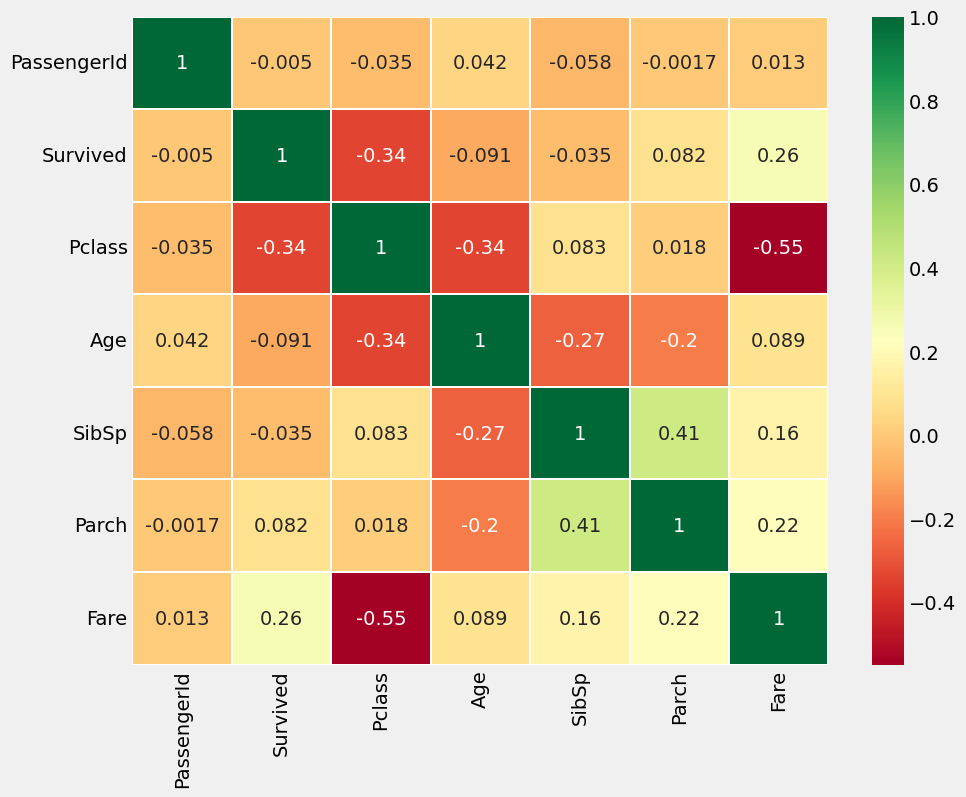

In [124]:
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()